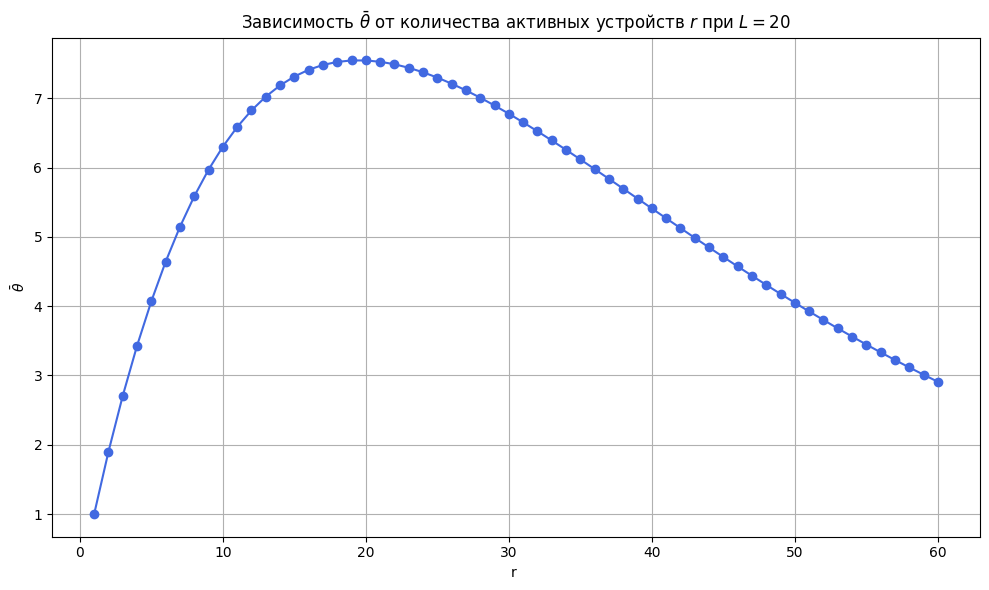

In [2]:
import numpy as np
from scipy.special import comb

import matplotlib.pyplot as plt

L = 20
r_values = np.arange(1, 61)  # от 1 до 60 активных устройств
bar_theta_values = []

# Функция биномиального приближения, как раньше
def beta_tilde_k_r_full(k, r, L):
    m = min(L, r)
    if m == 0 or k > m:
        return 0
    p = (r * ((1 - 1 / L) ** (r - 1))) / m
    if p > 1:
        p = 1
    return comb(m, k) * (p ** k) * ((1 - p) ** (m - k))

# Вычисление bar_theta(r) для каждого r
for r in r_values:
    theta_k = np.array([beta_tilde_k_r_full(k, r, L) for k in range(L + 1)])
    k_vals = np.arange(L + 1)
    bar_theta_r = np.sum(k_vals * theta_k)
    bar_theta_values.append(bar_theta_r)

# Визуализация (с русскими подписями)
plt.figure(figsize=(10, 6))
plt.plot(r_values, bar_theta_values, marker='o', linestyle='-', color='royalblue')
plt.xlabel("r ")
plt.ylabel(r"$\bar{\theta}$ ")
plt.title(r"Зависимость $\bar{\theta}$ от количества активных устройств $r$ при $L = 20$")
plt.grid(True)
plt.tight_layout()
plt.show()
